In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dogs-vs-cats


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout

In [41]:
# it is difficult to feed such large dataset in one go, hence we use generators. generators divide the whole data in batches and use it in batch
train_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=55,
    image_size=(256,256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/dogs-vs-cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=55,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [42]:
# the images stored in train_ds and validation_ds is stored in numpy array format (0-255) and we have to convert the value in range 0-1
# basically we have to normalize it

def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(normalize)
validation_ds = validation_ds.map(normalize)

In [43]:
# create CNN Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(GlobalAveragePooling2D())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 10, 10, 256)    │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,134,081 (8.14 MB)

 Trainable params: 2,134,081 (8.14 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 56s 140ms/step - accuracy: 0.5002 - loss: 0.6936 - val_accuracy: 0.5872 - val_loss: 0.6596
Epoch 2/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 80s 140ms/step - accuracy: 0.6166 - loss: 0.6566 - val_accuracy: 0.6684 - val_loss: 0.6123
Epoch 3/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 82s 141ms/step - accuracy: 0.6898 - loss: 0.5997 - val_accuracy: 0.6882 - val_loss: 0.6005
Epoch 4/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 48s 132ms/step - accuracy: 0.7604 - loss: 0.4993 - val_accuracy: 0.7984 - val_loss: 0.4435
Epoch 5/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 51s 141ms/step - accuracy: 0.8202 - loss: 0.4125 - val_accuracy: 0.8468 - val_loss: 0.3467
Epoch 6/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 51s 141ms/step - accuracy: 0.8590 - loss: 0.3281 - val_accuracy: 0.8718 - val_loss: 0.3088
Epoch 7/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 52s 142ms/step - accuracy: 0.8896 - loss: 0.2607 - val_accuracy: 0.8966 - val_loss: 0.2401
Epoch 8/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 49s 134ms/step - accuracy: 0.9103 - loss: 0

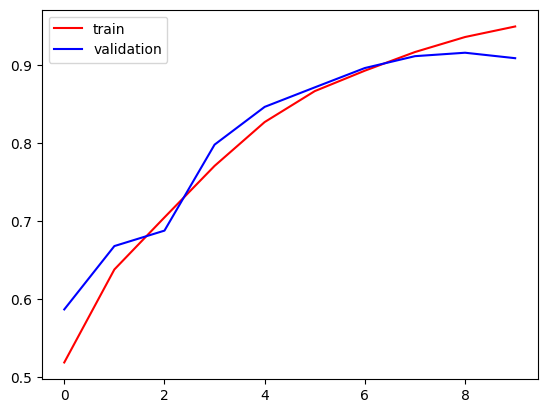

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

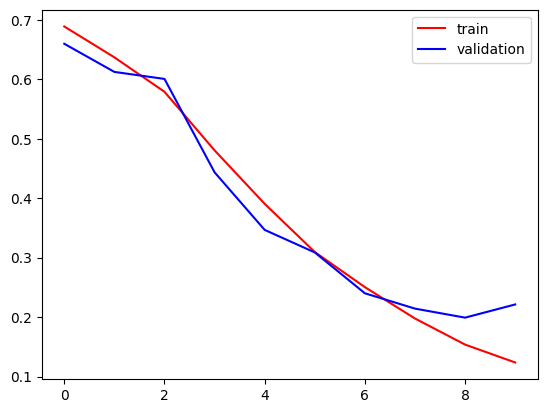

In [48]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [30]:
import cv2

In [49]:
test_image = cv2.imread('/content/Labrador_Retriever_portrait.jpg')

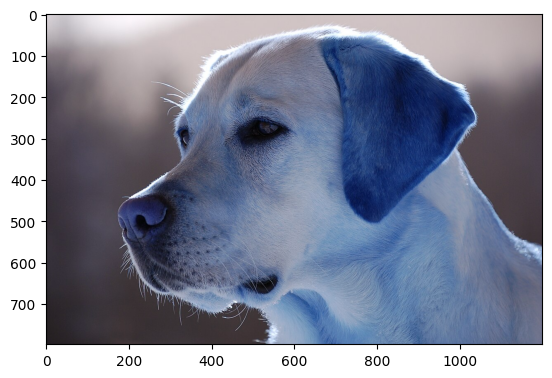

In [50]:
plt.imshow(test_image)

In [51]:
test_image = cv2.resize(test_image,(256,256))

In [52]:
test_input = test_image.reshape(1,256,256,3)

In [53]:
model.predict(test_input).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 973ms/step


array([[1]])